In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn as sk
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras
import os
import pathlib
import cv2
import PIL.Image
%load_ext tensorboard

In [ ]:
time=np.arange(0, 50, 0.1)

In [ ]:
amp=np.cos(time)

Text(0, 0.5, 'Amplitude')

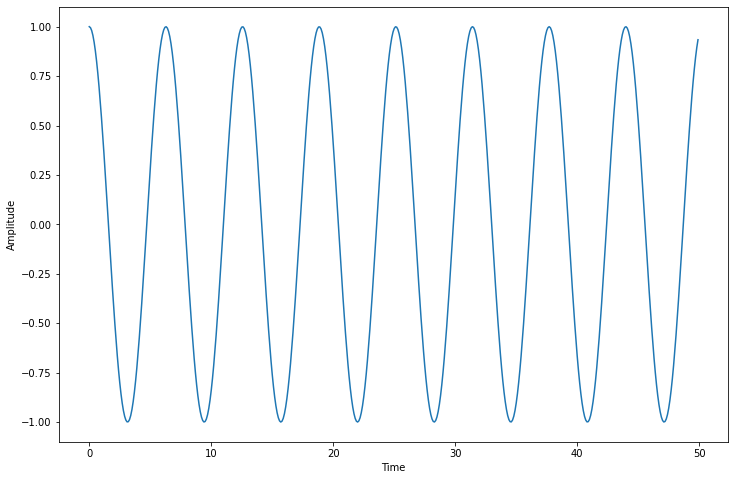

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(time, amp)
plt.xlabel("Time")
plt.ylabel("Amplitude")

In [ ]:
len(time) == len(amp)

True

In [ ]:
data=pd.DataFrame(amp, index=time, columns=["amp"])

In [ ]:
0.8 * 500

400.0

In [ ]:
train_data=data.iloc[:400]
test_data=data.iloc[400:]

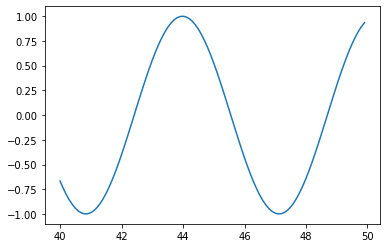

In [ ]:
plt.plot(test_data)

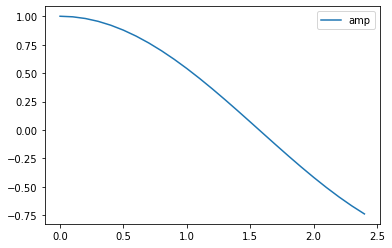

In [ ]:
train_data.iloc[:25].plot()

FEATURE SCALING

In [ ]:
from sklearn.preprocessing import MinMaxScaler

data=MinMaxScaler()
scaled_train=data.fit_transform(train_data)
scaled_test=data.transform(test_data)

TIME SERIES GENERATOR

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
length=65

train_gen=TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=2)
test_gen=TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=2)

Build Model

In [ ]:
from keras.layers import Dense, SimpleRNN, LSTM

In [ ]:
model=tf.keras.models.Sequential()
model.add(LSTM(length, input_shape=(length, 1)))
model.add(Dense(1))
model.compile("adam", "mse")

Early Stopping

In [ ]:
# from keras.callbacks import EarlyStopping, History
# stop=EarlyStopping(monitor="val_loss", mode="min")
# history=History()

In [ ]:
model.fit(train_gen, epochs=8)

Epoch 1/8
168/168 [==============================] - 5s 29ms/step - loss: 5.7663e-05
Epoch 2/8
168/168 [==============================] - 5s 29ms/step - loss: 1.6334e-04
Epoch 3/8
168/168 [==============================] - 5s 28ms/step - loss: 1.8642e-04
Epoch 4/8
168/168 [==============================] - 5s 29ms/step - loss: 0.0039
Epoch 5/8
168/168 [==============================] - 5s 28ms/step - loss: 1.6245e-04
Epoch 6/8
168/168 [==============================] - 5s 29ms/step - loss: 1.3840e-05
Epoch 7/8
168/168 [==============================] - 5s 29ms/step - loss: 1.4618e-05
Epoch 8/8
168/168 [==============================] - 5s 29ms/step - loss: 5.7842e-06


In [ ]:
model.save("rnn_lstm_model.h5")

In [ ]:
eval=np.expand_dims(scaled_train[-length:],0)

In [ ]:
model.predict(eval)

array([[0.16695142]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.16651776])

In [ ]:
len(scaled_test)

100

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = np.expand_dims(scaled_train[-length:],0)

for i in range(len(scaled_test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
pred=data.inverse_transform(test_predictions)

In [ ]:
res=pd.DataFrame(test_data["amp"].values, columns=["real"])
res['pred']=pred

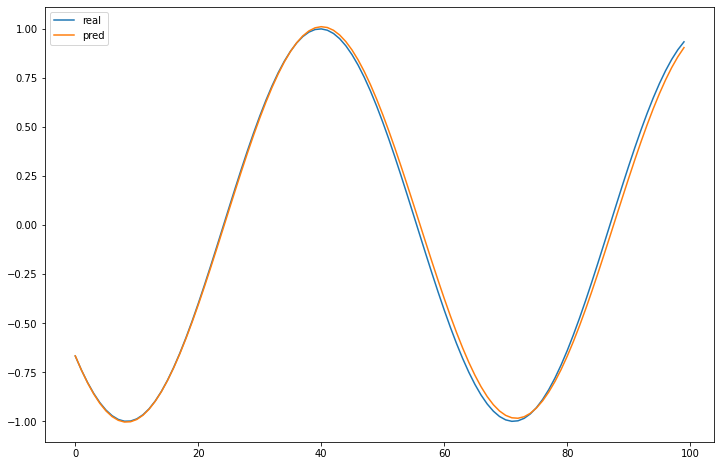

In [ ]:
res.plot(figsize=(12,8))

__________<h1>FORECASTING </h1>______________

In [ ]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = np.expand_dims(scaled_train[-length:],0)
forecast_upto=400

for i in range(forecast_upto):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [ ]:
pred=data.inverse_transform(test_predictions)

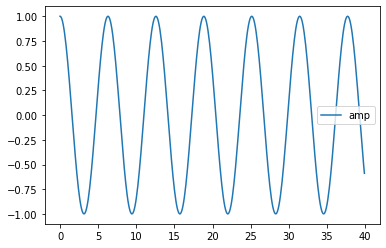

In [ ]:
train_data.plot()

# REAL GRAPH

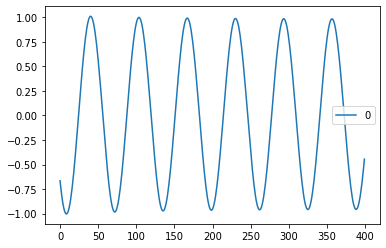

In [ ]:
res=pd.DataFrame(pred).plot()

# FORECASTED GRAPH